In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
df = pd.read_csv("/content/gdrive/MyDrive/Semester 3/Matkul Machine Learning/Praktikum/7/Data/stock_dataset.csv")


In [37]:
df = df.drop(columns=["date", "ticker"], errors="ignore")

In [48]:
# Pisahkan fitur dan target
X = df.drop(columns=["TARGET"], errors="ignore")
y = df["TARGET"]


In [50]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [51]:
X = df.drop(columns=["TARGET"], errors="ignore")
y = df["TARGET"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

In [53]:
model = RandomForestClassifier(
    n_estimators=200,       # jumlah pohon
    max_depth=10,          # batasi kedalaman agar tidak overfitting
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [54]:
y_pred = model.predict(X_test)

print("🎯 Akurasi Model: ", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

🎯 Akurasi Model:  91.2 %

Confusion Matrix:
 [[657   1]
 [ 73 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       658
           1       0.99      0.60      0.75       183

    accuracy                           0.91       841
   macro avg       0.95      0.80      0.85       841
weighted avg       0.92      0.91      0.90       841



In [60]:
next_day_data_imputed = imputer.transform(next_day_data)
prediction = model.predict(next_day_data_imputed)
print("\nPrediksi harga saham berikutnya:", "Naik 📈" if prediction[0] == 1 else "Turun 📉")


Prediksi harga saham berikutnya: Turun 📉


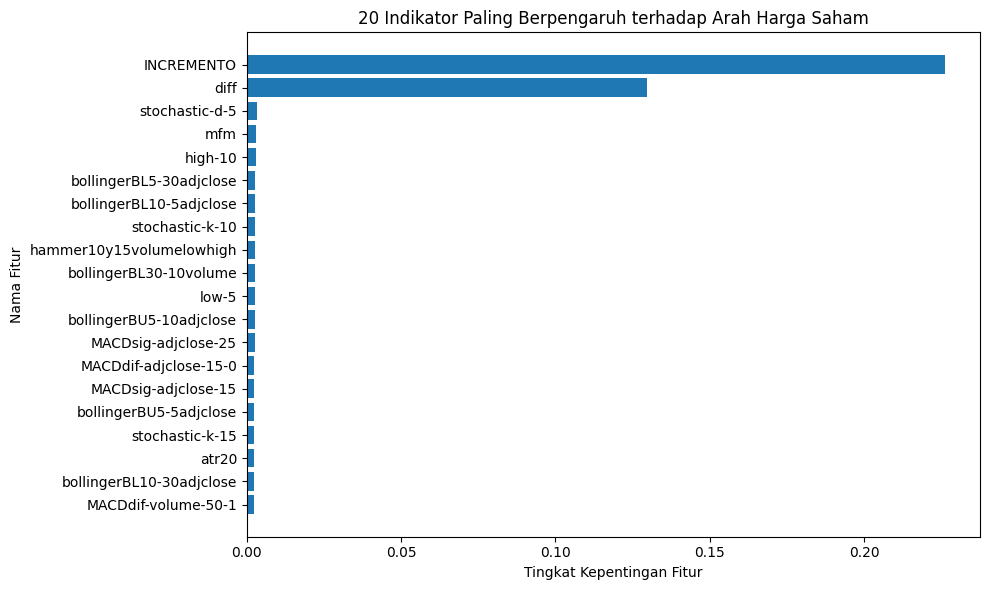

In [59]:
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # ambil 20 fitur teratas

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Tingkat Kepentingan Fitur")
plt.ylabel("Nama Fitur")
plt.title("20 Indikator Paling Berpengaruh terhadap Arah Harga Saham")
plt.tight_layout()
plt.show()